# Elevator Failure Prediction: Predictive Maintenence Dataset

Datasets from a variety of IoT sensors for predictive maintenance in the elevator industry. The data is useful for predictive maintenance of elevators doors in order to reduce unplanned stops and maximize equipment life cycle.

The dataset contains operation data, in the form of time series sampled at 4Hz in high-peak and evening elevator usage in a building (between 16:30 and 23:30).
For an elevator car door the system we consider: Electromechanical sensors (Door Ball Bearing Sensor), Ambiance (Humidity), and Physics (Vibration).

Target: Vibration (predict the absolute value of vibration)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Machine_Learning_Self

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Self


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
# load data 
df = pd.read_csv("dataset.csv")
df = df.drop(columns=["ID"])

In [ ]:
df.head()

,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001
1,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001
2,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004
3,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004
4,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004


In [ ]:
df.isnull().sum()

revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   revolutions  112001 non-null  float64
 1   humidity     112001 non-null  float64
 2   vibration    109563 non-null  float64
 3   x1           112001 non-null  float64
 4   x2           112001 non-null  float64
 5   x3           112001 non-null  float64
 6   x4           112001 non-null  float64
 7   x5           112001 non-null  float64
dtypes: float64(8)
memory usage: 6.8 MB


In [ ]:
mean_vibration = np.mean(df["vibration"])
df["vibration"].fillna(mean_vibration,inplace=True)
print(mean_vibration)

28.34027573177032


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   revolutions  112001 non-null  float64
 1   humidity     112001 non-null  float64
 2   vibration    112001 non-null  float64
 3   x1           112001 non-null  float64
 4   x2           112001 non-null  float64
 5   x3           112001 non-null  float64
 6   x4           112001 non-null  float64
 7   x5           112001 non-null  float64
dtypes: float64(8)
memory usage: 6.8 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8923c640d0>,
      dtype=object)

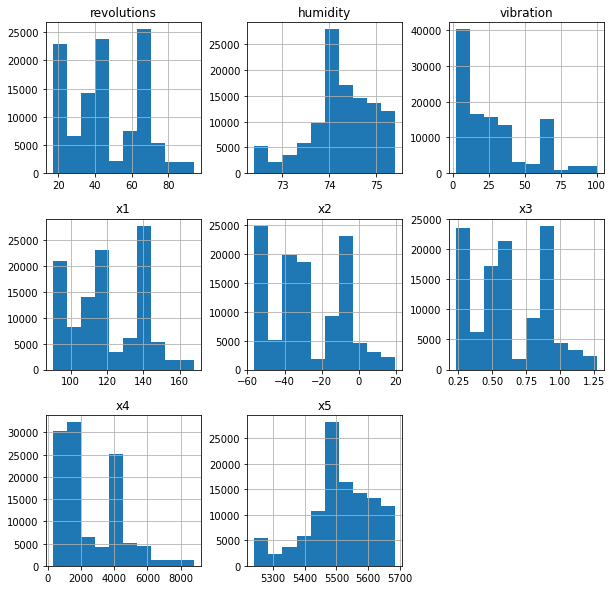

In [ ]:
# A histogram is a representation of the distribution of data
df.hist(figsize=(10,10))

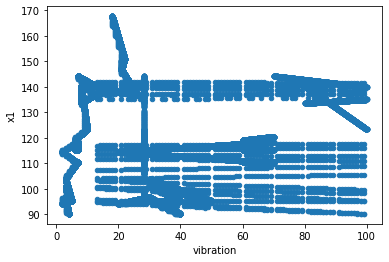

In [ ]:
df.plot(kind="scatter",x="vibration",y="x1")

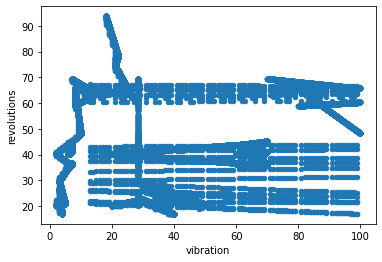

In [ ]:
df.plot(kind="scatter",x="vibration",y="revolutions")

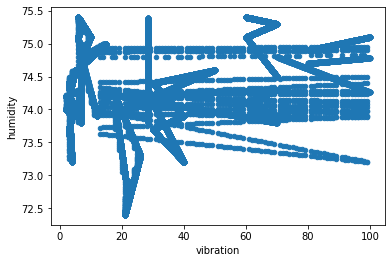

In [ ]:
df.plot(kind="scatter",x="vibration",y="humidity")

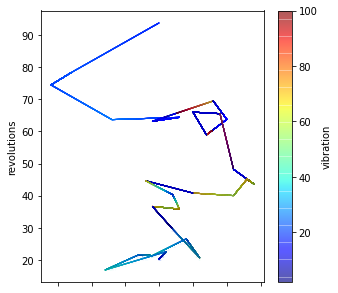

In [ ]:
df.plot(kind="scatter",x="humidity",y="revolutions",
        s=df["x3"]/100,c="vibration",
        alpha=0.4,colorbar=True,cmap=plt.get_cmap("jet"),figsize=(5,5))

In [ ]:
# mean = the average
# std = standard deviation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
revolutions,112001.0,46.275195,19.042179,16.933000,29.651000,43.348000,63.997000,93.744000
humidity,112001.0,74.224140,0.684711,72.399000,73.914000,74.212000,74.731000,75.400000
vibration,112001.0,28.340276,24.026647,2.000000,8.000000,21.460000,38.820000,100.000000
x1,112001.0,120.499335,18.984921,90.132000,103.850000,117.640000,138.119000,167.743000
x2,112001.0,-27.948945,19.123796,-56.353000,-44.548000,-31.443000,-10.012000,19.745000
x3,112001.0,0.623759,0.258677,0.231328,0.399615,0.580561,0.865330,1.266828
x4,112001.0,2503.994994,1874.972912,286.726489,879.181801,1879.049104,4095.616009,8787.937536
x5,112001.0,5509.691804,101.395621,5241.615201,5463.279396,5507.420944,5584.722361,5685.160000


In [ ]:
corr = df.corr()
corr

,revolutions,humidity,vibration,x1,x2,x3,x4,x5
revolutions,1.000000,-0.101476,-0.114037,0.999356,0.999365,0.999593,0.982563,-0.098903
humidity,-0.101476,1.000000,0.135338,-0.065716,-0.136847,-0.128683,-0.207702,0.999980
vibration,-0.114037,0.135338,1.000000,-0.109500,-0.118396,-0.116651,-0.141692,0.135686
x1,0.999356,-0.065716,-0.109500,1.000000,0.997444,0.997967,0.978035,-0.063136
x2,0.999365,-0.136847,-0.118396,0.997444,1.000000,0.999934,0.985806,-0.134285
x3,0.999593,-0.128683,-0.116651,0.997967,0.999934,1.000000,0.985077,-0.126093
x4,0.982563,-0.207702,-0.141692,0.978035,0.985806,0.985077,1.000000,-0.205227
x5,-0.098903,0.999980,0.135686,-0.063136,-0.134285,-0.126093,-0.205227,1.000000


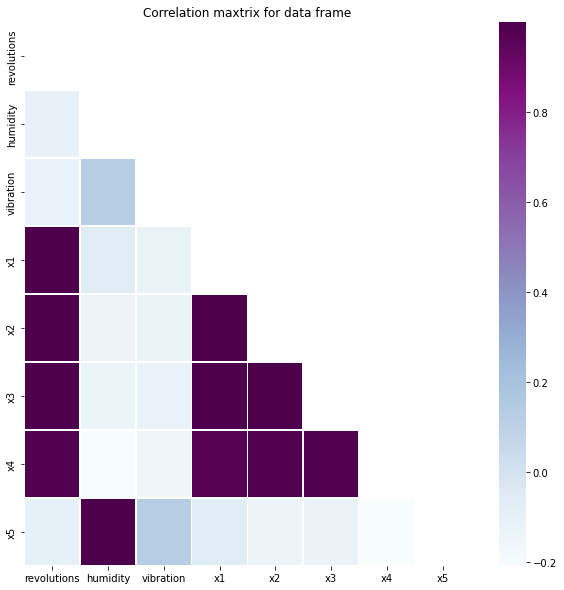

In [ ]:
import seaborn as sns
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(figsize = (10,10))
plt.title('Correlation maxtrix for data frame')
sns.heatmap(corr, mask = mask, cmap = "BuPu", linewidths = 0.5)
plt.show()

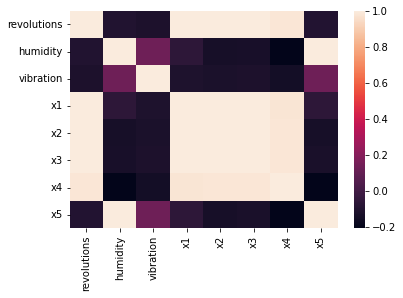

In [ ]:
ax = sns.heatmap(corr)

In [ ]:
df.corr()["vibration"].sort_values(ascending=False)

vibration      1.000000
x5             0.135686
humidity       0.135338
x1            -0.109500
revolutions   -0.114037
x3            -0.116651
x2            -0.118396
x4            -0.141692
Name: vibration, dtype: float64

In [ ]:
features = [col for col in df.columns if col != 'vibration']
target = df['vibration'].copy()

df['std'] = df[features].std(axis = 1)
features

['revolutions', 'humidity', 'x1', 'x2', 'x3', 'x4', 'x5']

In [ ]:
df

,revolutions,humidity,vibration,x1,x2,x3,x4,x5,std
0,93.744,73.999,18.00,167.743,19.745,1.266828,8787.937536,5475.852001,3575.832760
1,93.740,73.999,18.00,167.739,19.741,1.266774,8787.187600,5475.852001,3575.599717
2,93.736,73.998,18.00,167.734,19.738,1.266737,8786.437696,5475.704004,3575.343408
3,93.732,73.998,18.00,167.730,19.734,1.266683,8785.687824,5475.704004,3575.110397
4,93.729,73.998,18.00,167.727,19.731,1.266642,8785.125441,5475.704004,3574.935650
...,...,...,...,...,...,...,...,...,...
111996,20.186,73.992,2.00,94.178,-53.806,0.272813,407.474596,5474.816064,2040.631318
111997,20.186,73.992,20.01,94.178,-53.806,0.272813,407.474596,5474.816064,2040.631318
111998,20.185,73.992,20.01,94.177,-53.807,0.272800,407.434225,5474.816064,2040.633016
111999,20.185,73.992,20.00,94.177,-53.807,0.272800,407.434225,5474.816064,2040.633016


In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

train_set.reset_index(inplace=True,drop=True)
test_set.reset_index(inplace=True,drop=True)

In [ ]:
print("train_set data size: ", train_set.shape)
print("test_set data size:", test_set.shape)
train_set

train_set data size:  (89600, 9)
test_set data size: (22401, 9)


,revolutions,humidity,vibration,x1,x2,x3,x4,x5,std
0,21.498,73.822,3.61,95.320,-52.324,0.291214,462.164004,5449.687684,2028.986003
1,28.562,74.248,3.24,102.810,-45.686,0.384684,815.787844,5512.765504,2043.690019
2,21.429,73.869,38.47,95.298,-52.440,0.290095,459.202041,5456.629161,2031.710736
3,24.869,74.413,4.07,99.282,-49.544,0.334202,618.467161,5537.294569,2056.833641
4,65.693,74.262,99.86,139.955,-8.569,0.884611,4315.570249,5514.844644,2397.452543
...,...,...,...,...,...,...,...,...,...
89595,36.352,74.059,6.21,110.411,-37.707,0.490852,1321.467904,5484.735481,2035.902186
89596,21.236,74.038,2.43,95.274,-52.802,0.286826,450.967696,5481.625444,2041.435134
89597,17.296,73.238,39.24,90.534,-55.942,0.236162,299.151616,5363.804644,2003.767499
89598,90.425,73.719,18.86,164.144,16.706,1.226617,8176.680625,5434.490961,3381.390368


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Use vibration is label data
train_labels = train_set["vibration"].copy()
test_labels = test_set["vibration"].copy()

# Drop or delete vibration in to data feature
train_set.drop(columns=["vibration"],inplace=True)
test_set.drop(columns=["vibration"],inplace=True)

train_cols = train_set.columns
test_cols = test_set.columns

train_labels

0         3.61
1         3.24
2        38.47
3         4.07
4        99.86
         ...  
89595     6.21
89596     2.43
89597    39.24
89598    18.86
89599    17.46
Name: vibration, Length: 89600, dtype: float64

In [ ]:
train_scaled = pd.DataFrame(scaler.fit_transform(train_set))
test_scaled = pd.DataFrame(scaler.fit_transform(test_set))

In [ ]:
# add feature name to data
train_scaled.columns = train_cols
test_scaled.columns = test_cols

# create new scaled data with label
train_scaled = train_scaled.assign(vibration=train_labels)
test_scaled = test_scaled.assign(vibration=test_labels)

In [ ]:
train_scaled

,revolutions,humidity,x1,x2,x3,x4,x5,std,vibration
0,-1.297309,-0.586775,-1.322304,-1.270842,-1.281771,-1.086439,-0.591234,-0.743281,3.61
1,-0.926446,0.035569,-0.927909,-0.923813,-0.920522,-0.897727,0.031039,-0.686039,3.24
2,-1.300932,-0.518113,-1.323462,-1.276907,-1.286098,-1.088020,-0.522755,-0.732674,38.47
3,-1.120330,0.276617,-1.113680,-1.125506,-1.115627,-1.003028,0.273022,-0.634871,4.07
4,1.022951,0.056021,1.028002,1.016634,1.011636,0.969938,0.051550,0.691151,99.86
...,...,...,...,...,...,...,...,...,...
89595,-0.517467,-0.240542,-0.527670,-0.506677,-0.510195,-0.627870,-0.245482,-0.716357,6.21
89596,-1.311064,-0.271221,-1.324726,-1.295832,-1.298732,-1.092414,-0.276163,-0.694817,2.43
89597,-1.517916,-1.439941,-1.574316,-1.459989,-1.494542,-1.173431,-1.438483,-0.841456,39.24
89598,2.321393,-0.737248,2.301700,2.337990,2.333447,3.030426,-0.741152,4.521600,18.86


In [ ]:
test_scaled

,revolutions,humidity,x1,x2,x3,x4,x5,std,vibration
0,-1.401346,-1.043165,-1.443590,-1.357635,-1.380774,-1.134708,-1.045390,-0.803809,33.77
1,1.437121,-2.595319,1.347912,1.523807,1.518446,1.558980,-2.575318,1.389958,21.27
2,-0.560895,0.078646,-0.559862,-0.561204,-0.558802,-0.660352,0.074244,-0.677636,69.07
3,0.352012,1.188786,0.396135,0.307778,0.317681,0.163000,1.193700,-0.102161,9.42
4,0.933134,0.468143,0.953075,0.912155,0.909655,0.854233,0.465710,0.581825,8.00
...,...,...,...,...,...,...,...,...,...
22396,-1.417646,-1.091305,-1.461684,-1.372134,-1.396632,-1.141220,-1.093176,-0.808815,34.42
22397,1.004539,0.042176,1.009307,0.998524,0.993560,0.948136,0.037661,0.664818,10.02
22398,0.938918,0.463767,0.958719,0.918070,0.915501,0.861766,0.461304,0.591588,8.00
22399,2.149537,-1.107352,2.116434,2.179640,2.177410,2.721990,-1.109100,3.817520,19.64


In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.array(train_scaled.drop(columns=["vibration"]))
y_train = np.array(train_scaled["vibration"])

X_test = np.array(test_scaled.drop(columns=["vibration"]))
y_test = np.array(test_scaled["vibration"])


In [ ]:
X_train,X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2,random_state=42)

In [ ]:
def plot_learning_curves(model,X_train,y_train,X_val,y_val):
  train_errors = []
  val_errors = []
  for m in range(1,len(X_train)):
    tmp_X_train = X_train[:m]
    tmp_y_train = y_train[:m]
    model.fit(tmp_X_train, tmp_y_train)
    y_train_pred = model.predict(tmp_X_train)
    y_val_pred = model.predict(X_val)
    train_error = mean_squared_error(tmp_y_train, y_train_pred)
    val_error = mean_squared_error(y_val,y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.xlabel("Training set size", fontsize=14)
  plt.ylabel("RMSE", fontsize=14)
  plt.legend(loc = "best")
  plt.axis([0, len(X_train), 0, 300000])
  plt.show()

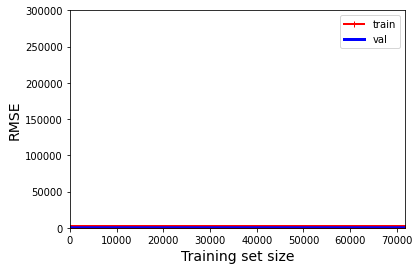

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X_train, y_train, X_val, y_val)


In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

lin_reg.score(X_train,y_train)

0.07466059887245469

In [ ]:
mse = mean_squared_error(y_test,lin_reg.predict(X_test))
rmse = np.sqrt(mse)

print("RMSE: ", rmse)

RMSE:  23.177954878095367


In [ ]:
y_val

array([ 8.  ,  8.  , 68.13, ..., 24.28, 32.99, 64.05])

In [ ]:
y_val_pred = lin_reg.predict(X_val)

In [ ]:
y_val_pred

array([22.07827811, 24.87536047, 40.40633824, ..., 21.41995828,
       25.09354559, 34.5651783 ])